<a href="https://colab.research.google.com/github/lukaszek358/SDA/blob/main/projekt_ko%C5%84cowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [2]:
airlines = pd.read_csv('/content/airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [3]:
airports = pd.read_csv('/content/airports.csv')
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [4]:
flights = pd.read_csv('/content/flights.csv')
flights

<ipython-input-4-4f7f608eff55>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('/content/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights.shape

(5819079, 31)

In [6]:
flights = flights.rename(columns=str.lower)

In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   day_of_week          int64  
 4   airline              object 
 5   flight_number        int64  
 6   tail_number          object 
 7   origin_airport       object 
 8   destination_airport  object 
 9   scheduled_departure  int64  
 10  departure_time       float64
 11  departure_delay      float64
 12  taxi_out             float64
 13  wheels_off           float64
 14  scheduled_time       float64
 15  elapsed_time         float64
 16  air_time             float64
 17  distance             int64  
 18  wheels_on            float64
 19  taxi_in              float64
 20  scheduled_arrival    int64  
 21  arrival_time         float64
 22  arrival_delay        float64
 23  diverted             int64  
 24

In [8]:
flights.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,5819079.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
month,5819079.0,6.524085,3.405137,1.0,4.0,7.0,9.0,12.0
day,5819079.0,15.704594,8.783425,1.0,8.0,16.0,23.0,31.0
day_of_week,5819079.0,3.926941,1.988845,1.0,2.0,4.0,6.0,7.0
flight_number,5819079.0,2173.092742,1757.063999,1.0,730.0,1690.0,3230.0,9855.0
scheduled_departure,5819079.0,1329.602470,483.751821,1.0,917.0,1325.0,1730.0,2359.0
departure_time,5732926.0,1335.204439,496.423260,1.0,921.0,1330.0,1740.0,2400.0
departure_delay,5732926.0,9.370158,37.080942,-82.0,-5.0,-2.0,7.0,1988.0
taxi_out,5730032.0,16.071662,8.895574,1.0,11.0,14.0,19.0,225.0
wheels_off,5730032.0,1357.170841,498.009356,1.0,935.0,1343.0,1754.0,2400.0


In [9]:
flights.describe(include='object').T

,count,unique,top,freq
airline,5819079,14,WN,1261855
tail_number,5804358,4897,N480HA,3768
origin_airport,5819079,930,ATL,346836
destination_airport,5819079,930,ATL,346904
cancellation_reason,89884,4,B,48851


In [10]:
flights.isnull().sum()

year                         0
month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number              14721
origin_airport               0
destination_airport          0
scheduled_departure          0
departure_time           86153
departure_delay          86153
taxi_out                 89047
wheels_off               89047
scheduled_time               6
elapsed_time            105071
air_time                105071
distance                     0
wheels_on                92513
taxi_in                  92513
scheduled_arrival            0
arrival_time             92513
arrival_delay           105071
diverted                     0
cancelled                    0
cancellation_reason    5729195
air_system_delay       4755640
security_delay         4755640
airline_delay          4755640
late_aircraft_delay    4755640
weather_delay          4755640
dtype: int64

In [11]:
data_null= round(flights.isnull().sum()*100/flights.shape[0])
data_null

year                    0.0
month                   0.0
day                     0.0
day_of_week             0.0
airline                 0.0
flight_number           0.0
tail_number             0.0
origin_airport          0.0
destination_airport     0.0
scheduled_departure     0.0
departure_time          1.0
departure_delay         1.0
taxi_out                2.0
wheels_off              2.0
scheduled_time          0.0
elapsed_time            2.0
air_time                2.0
distance                0.0
wheels_on               2.0
taxi_in                 2.0
scheduled_arrival       0.0
arrival_time            2.0
arrival_delay           2.0
diverted                0.0
cancelled               0.0
cancellation_reason    98.0
air_system_delay       82.0
security_delay         82.0
airline_delay          82.0
late_aircraft_delay    82.0
weather_delay          82.0
dtype: float64

In [12]:
flights['flight_number'].nunique()

6952

In [13]:
flights['cancellation_reason'].unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [14]:
flights.head(20)

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
flights['arrival_delay'].nunique()

1240

In [16]:
flights['delayed'] = flights['arrival_delay'] >15

In [17]:
flights['delayed']

0          False
1          False
2          False
3          False
4          False
           ...  
5819074    False
5819075    False
5819076    False
5819077    False
5819078    False
Name: delayed, Length: 5819079, dtype: bool

<Axes: xlabel='month', ylabel='count'>

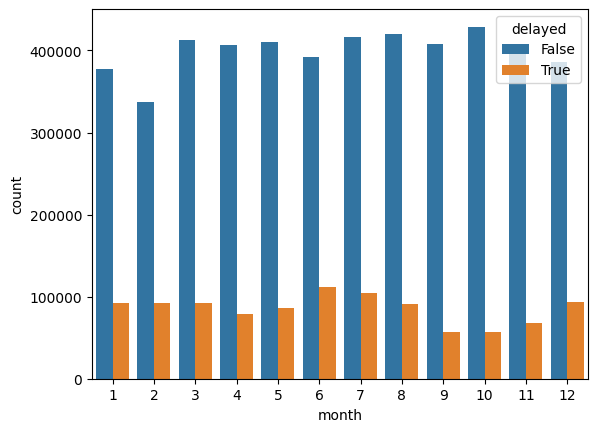

In [18]:
sns.countplot(x="month", hue="delayed", data=flights)

<Axes: xlabel='airline', ylabel='count'>

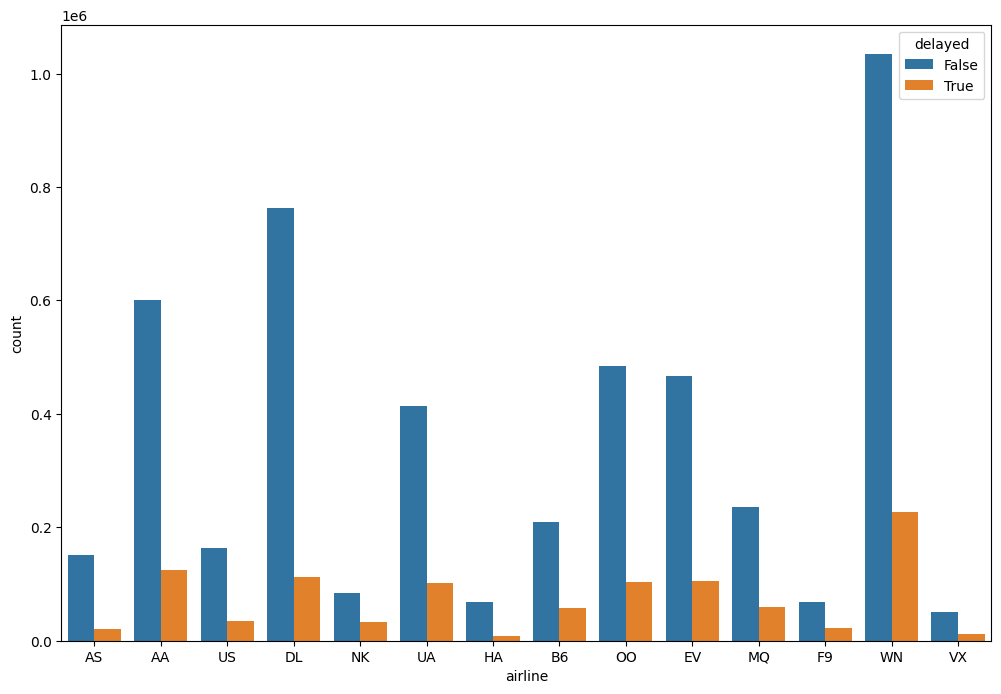

In [19]:
plt.figure(figsize = (12,8))
sns.countplot(x="airline", hue="delayed", data=flights)

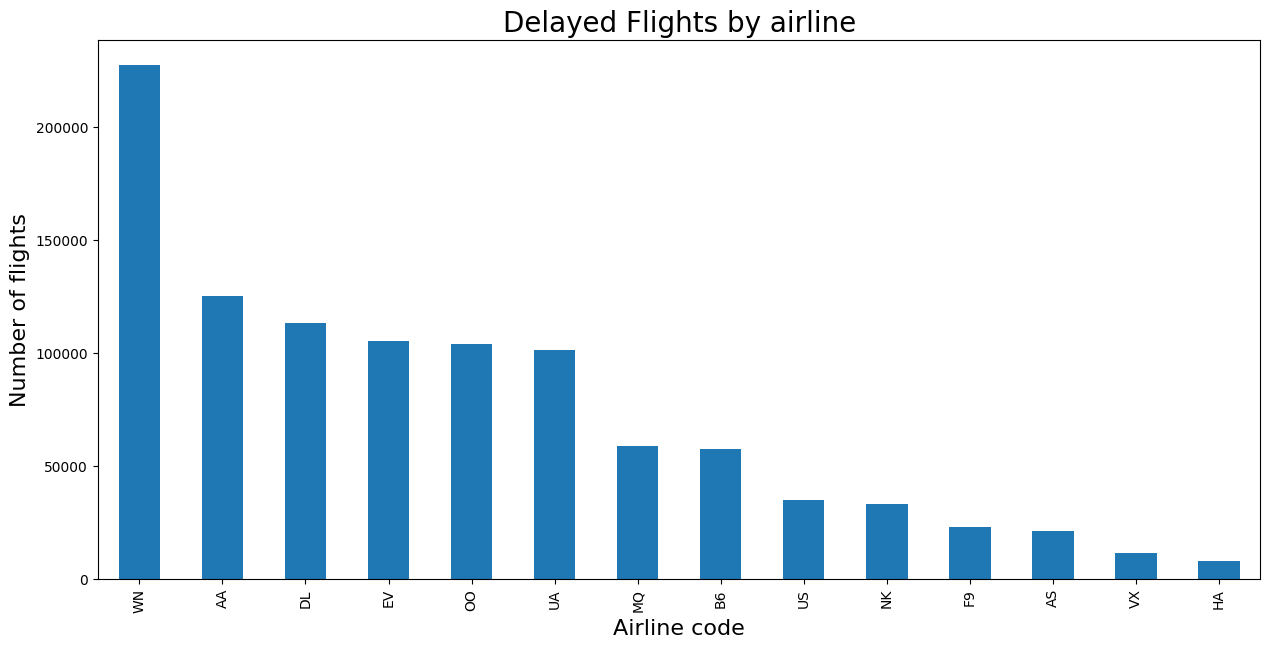

In [20]:
plt.figure(figsize=(15, 7))
flights.groupby('airline').delayed.sum().sort_values(ascending=False).plot.bar()
plt.title('Delayed Flights by airline', fontsize=20)
plt.xlabel('Airline code', fontsize=16)
plt.ylabel('Number of flights', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [21]:
flights.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'delayed'],
      dtype='object')

In [22]:
flights.origin_airport.value_counts() > 1

ATL       True
ORD       True
DFW       True
DEN       True
LAX       True
         ...  
11503    False
14222    False
13964    False
13459    False
12265    False
Name: origin_airport, Length: 930, dtype: bool

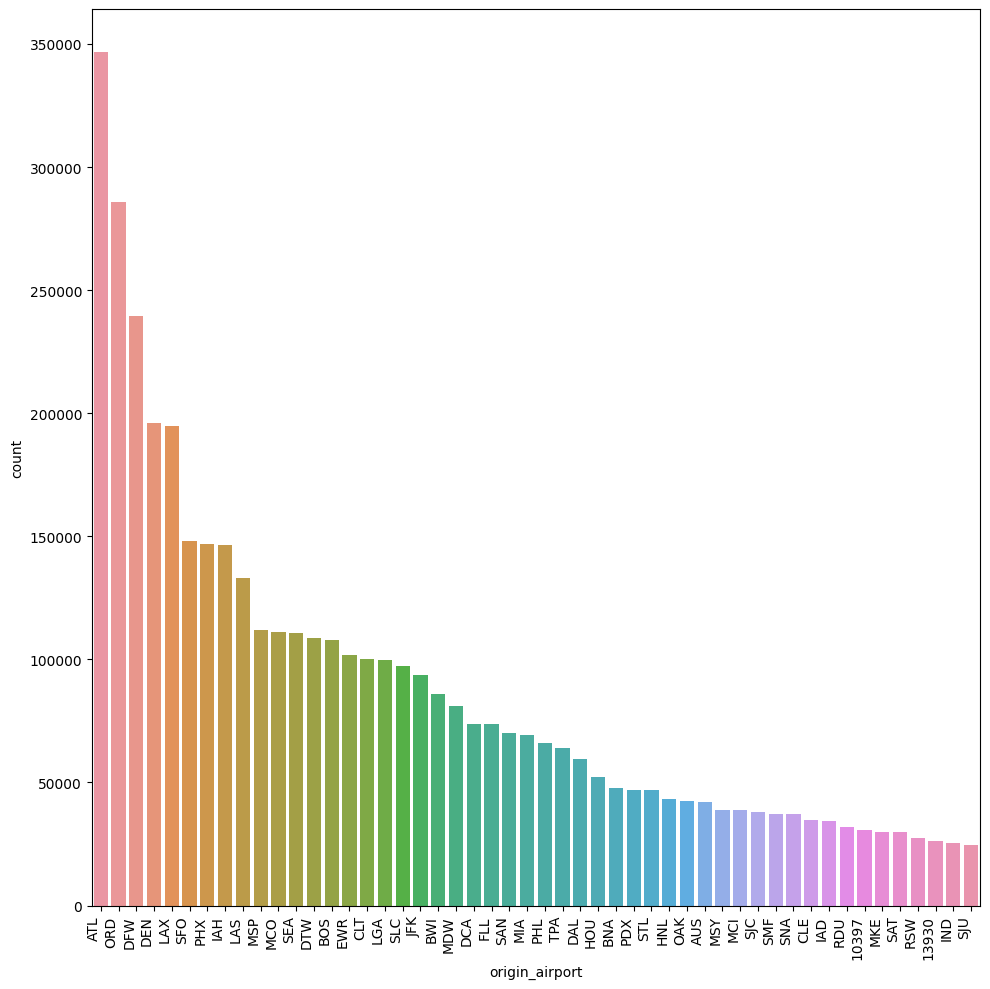

In [23]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['origin_airport'], data =flights, order=flights['origin_airport'].value_counts().iloc[:50].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [24]:
flights = flights.drop(columns=['year', 'day' ])

In [25]:
flights = flights.drop(columns=['tail_number', 'departure_time'])

In [26]:
flights = flights.drop(columns=['wheels_off', 'wheels_on', 'taxi_in', 'taxi_out', 'arrival_time'])

In [27]:
flights.head(10).T

,0,1,2,3,4,5,6,7,8,9
month,1,1,1,1,1,1,1,1,1,1
day_of_week,4,4,4,4,4,4,4,4,4,4
airline,AS,AA,US,AA,AS,DL,NK,US,AA,DL
flight_number,98,2336,840,258,135,806,612,2013,1112,1173
origin_airport,ANC,LAX,SFO,LAX,SEA,SFO,LAS,LAX,SFO,LAS
destination_airport,SEA,PBI,CLT,MIA,ANC,MSP,MSP,CLT,DFW,ATL
scheduled_departure,5,10,20,20,25,25,25,30,30,30
departure_delay,-11.0,-8.0,-2.0,-5.0,-1.0,-5.0,-6.0,14.0,-11.0,3.0
scheduled_time,205.0,280.0,286.0,285.0,235.0,217.0,181.0,273.0,195.0,221.0
elapsed_time,194.0,279.0,293.0,281.0,215.0,230.0,170.0,249.0,193.0,203.0


In [28]:
print(f' Flight diverted: {flights.diverted.unique()}')
print(f' Flight cancelled: {flights.cancelled.unique()}')

 Flight diverted: [0 1]
 Flight cancelled: [0 1]


In [29]:
flights['cancelled'] = flights['cancelled'] > 0
flights['diverted'] = flights['diverted'] > 0

In [30]:
# flights.diverted = flights.diverted.replace(0, 'False')

In [31]:
# flights.diverted = flights.diverted.replace(1, 'True')
# flights.cancelled = flights.cancelled.replace(0, 'False')
# flights.cancelled = flights.cancelled.replace(1, 'True')

In [32]:
flights.head(10).T

,0,1,2,3,4,5,6,7,8,9
month,1,1,1,1,1,1,1,1,1,1
day_of_week,4,4,4,4,4,4,4,4,4,4
airline,AS,AA,US,AA,AS,DL,NK,US,AA,DL
flight_number,98,2336,840,258,135,806,612,2013,1112,1173
origin_airport,ANC,LAX,SFO,LAX,SEA,SFO,LAS,LAX,SFO,LAS
destination_airport,SEA,PBI,CLT,MIA,ANC,MSP,MSP,CLT,DFW,ATL
scheduled_departure,5,10,20,20,25,25,25,30,30,30
departure_delay,-11.0,-8.0,-2.0,-5.0,-1.0,-5.0,-6.0,14.0,-11.0,3.0
scheduled_time,205.0,280.0,286.0,285.0,235.0,217.0,181.0,273.0,195.0,221.0
elapsed_time,194.0,279.0,293.0,281.0,215.0,230.0,170.0,249.0,193.0,203.0


<ipython-input-33-4af5732f0ed2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = flights.corr()


<Axes: >

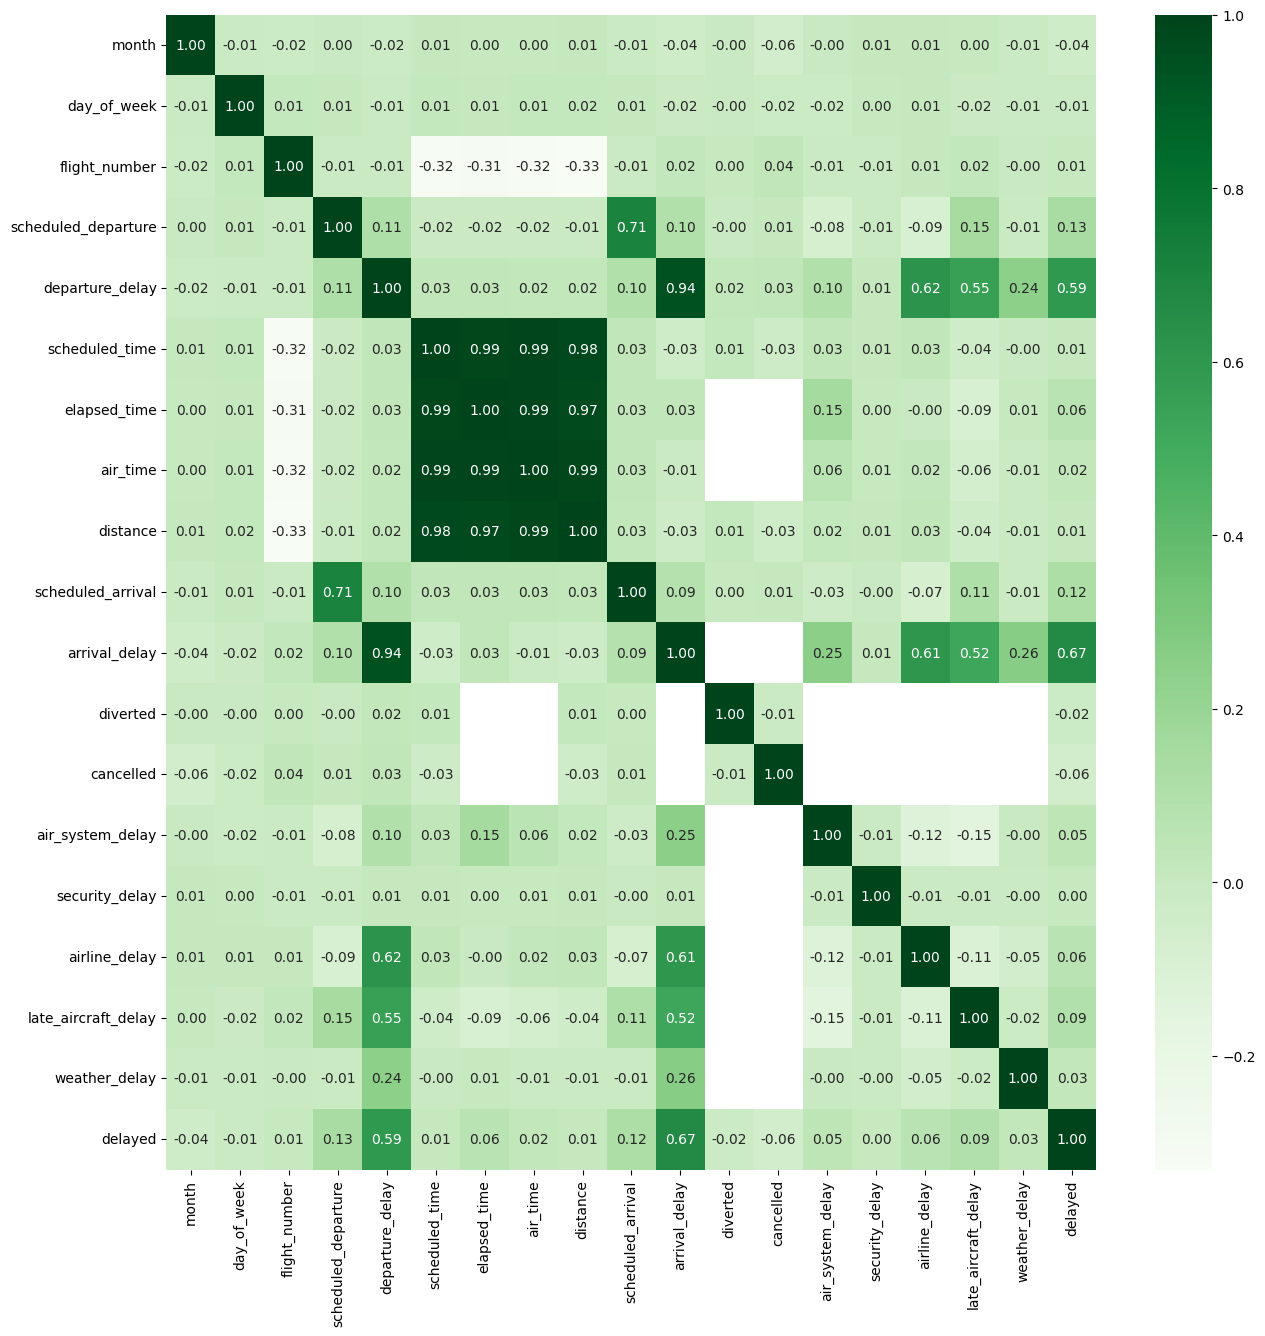

In [33]:
corr = flights.corr()

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt= '.2f', cmap = 'Greens', )

In [34]:
flights.dtypes

month                    int64
day_of_week              int64
airline                 object
flight_number            int64
origin_airport          object
destination_airport     object
scheduled_departure      int64
departure_delay        float64
scheduled_time         float64
elapsed_time           float64
air_time               float64
distance                 int64
scheduled_arrival        int64
arrival_delay          float64
diverted                  bool
cancelled                 bool
cancellation_reason     object
air_system_delay       float64
security_delay         float64
airline_delay          float64
late_aircraft_delay    float64
weather_delay          float64
delayed                   bool
dtype: object

In [35]:
flights.delayed.value_counts()

False    4795581
True     1023498
Name: delayed, dtype: int64